In [1]:
import numpy as np
import pandas as pd
from dataIO.Dataset import FeatureDataset, LoadAllFeatureDataSets

ds_list = LoadAllFeatureDataSets(isNormalized=True)
#for ds in ds_list:
#    ds.plot3D()

In [2]:
ds = ds_list[0]
idList = ds.idList
print(idList.shape)
X = ds.features
print(X.shape)

(5220,)
(5220, 32)


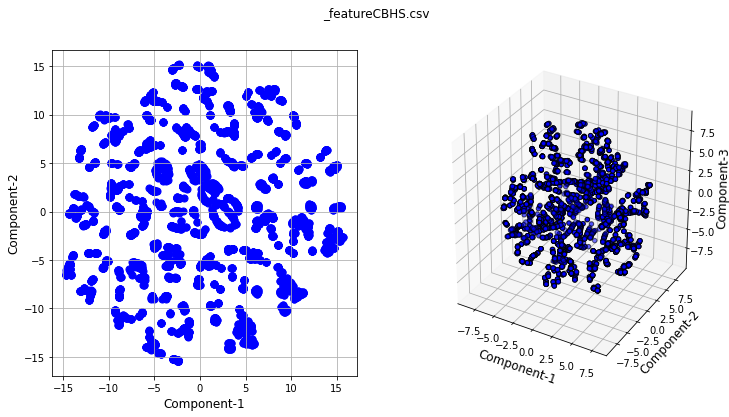

In [3]:
ds.plot()
#ds.plot3D()
#ds.plot2D()

[0 0 0 ... 2 2 2]


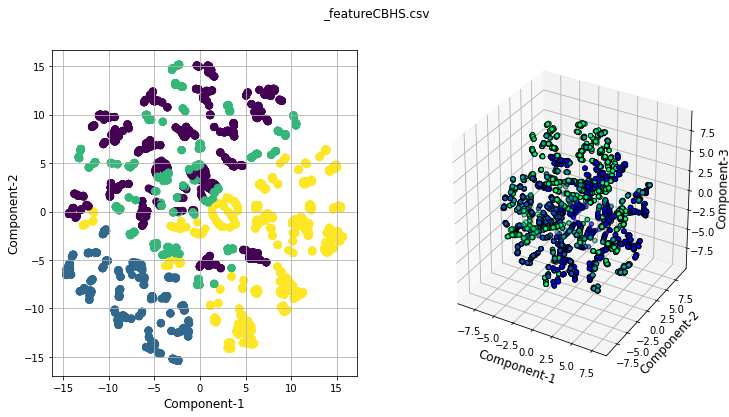

In [16]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(X)
print(kmedoids.labels_)
#print(kmedoids.cluster_centers_)
ds.plot(colors=kmedoids.labels_)

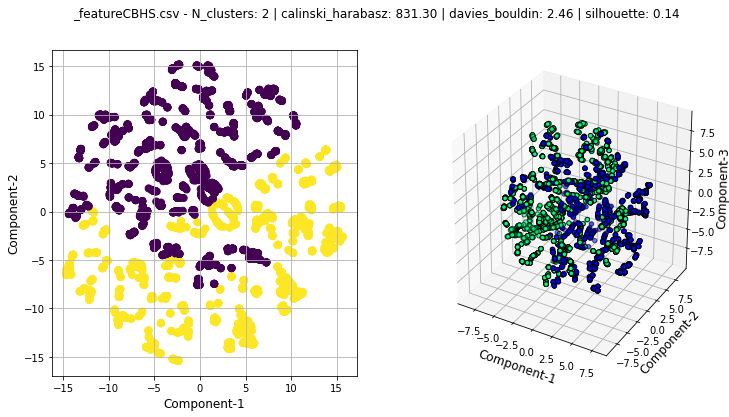

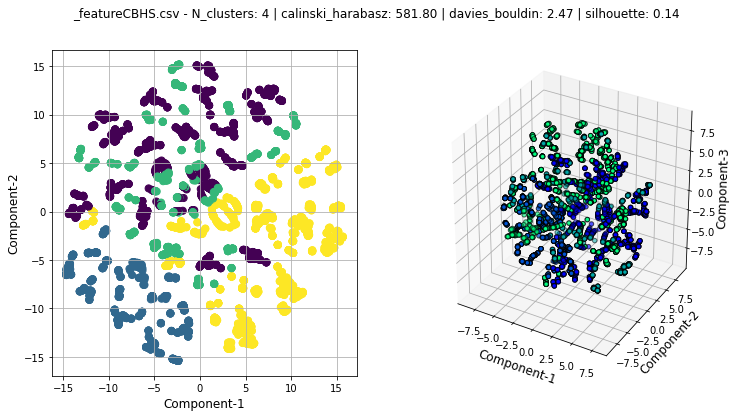

In [15]:
from sklearn_extra.cluster import KMedoids
from sklearn import metrics
for i in range(2,50):
    kmedoids = KMedoids(n_clusters=i, random_state=0).fit(X)
    labels = kmedoids.labels_
    # print(kmedoids.labels_)
    #print(kmedoids.cluster_centers_)
    score1 = metrics.calinski_harabasz_score(X, labels)
    score2 = metrics.davies_bouldin_score(X, labels)
    score3 = metrics.silhouette_score(X, labels, metric='euclidean')
    if (score3>=0.1):
        ds.plot(colors=labels, addText = 'N_clusters: ' + str(i) + 
                ' | calinski_harabasz: {0:,.2f}'.format(score1) +
                ' | davies_bouldin: {0:,.2f}'.format(score2)+
                ' | silhouette: {0:,.2f}'.format(score3))

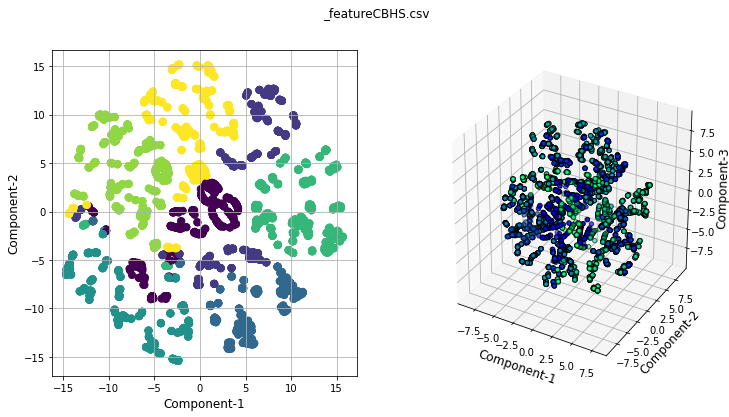

In [7]:
from sklearn.cluster import KMeans

km = KMeans(7)
clusts = km.fit_predict(X)
ds.plot(colors = clusts)

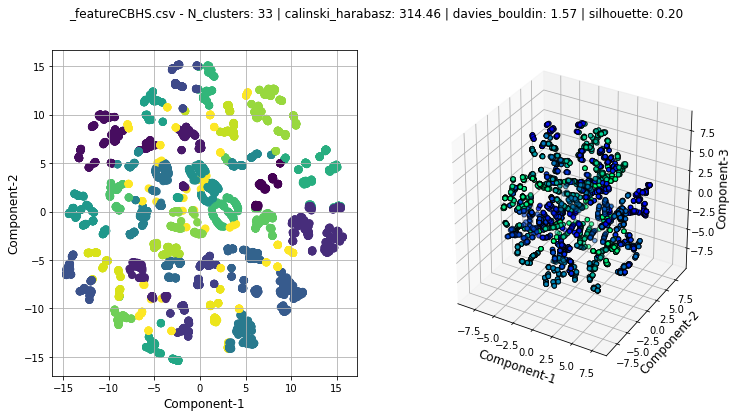

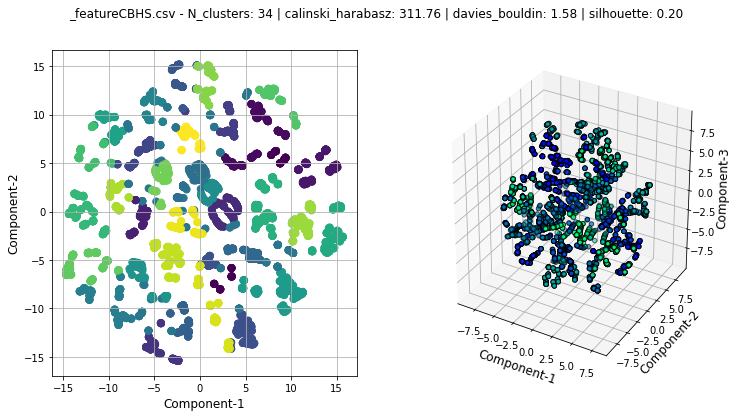

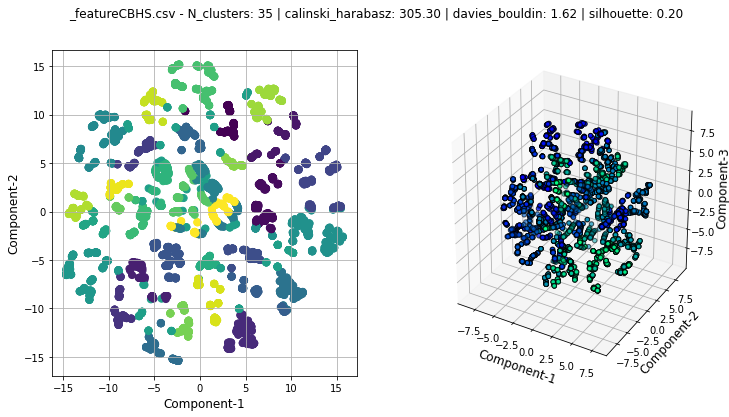

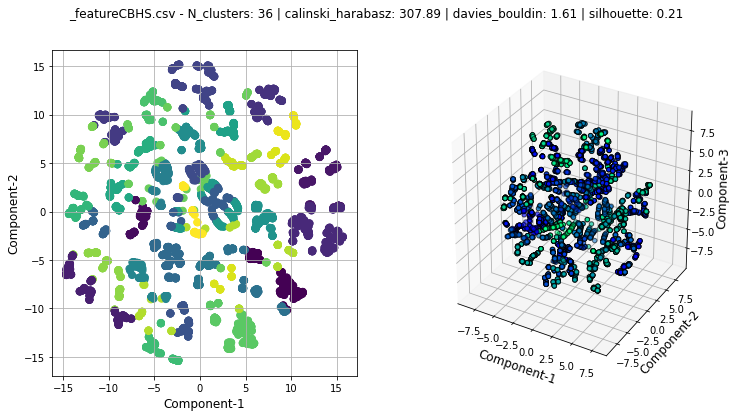

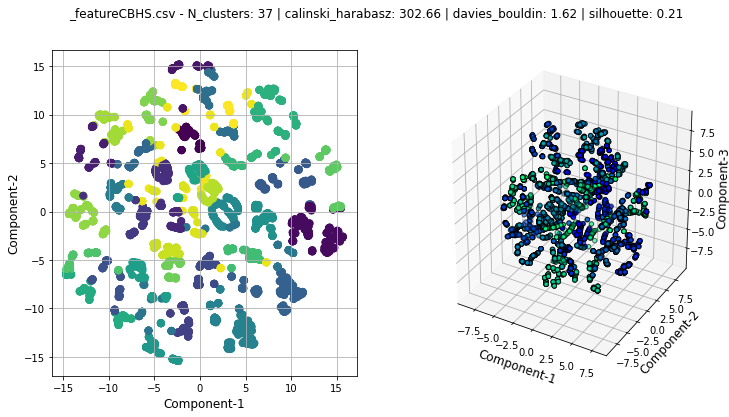

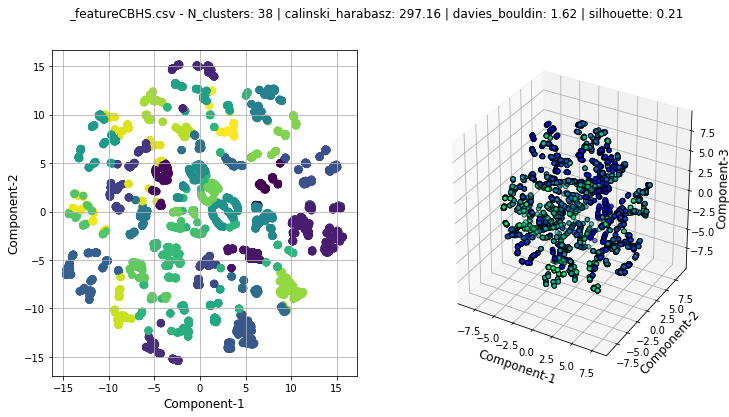

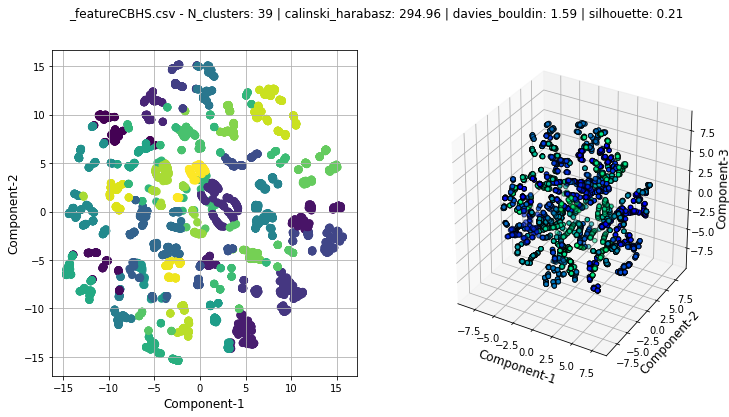

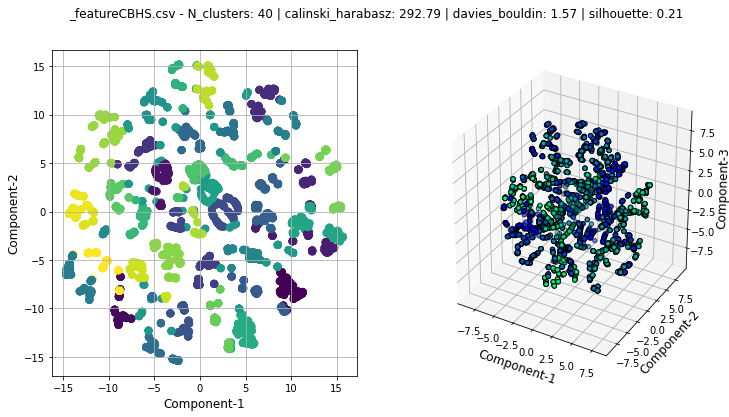

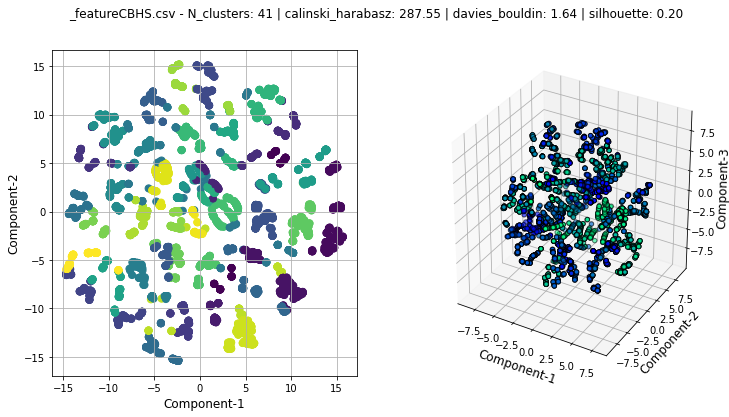

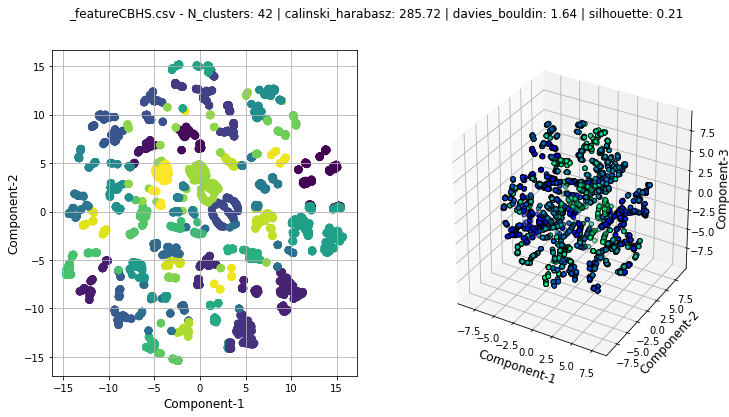

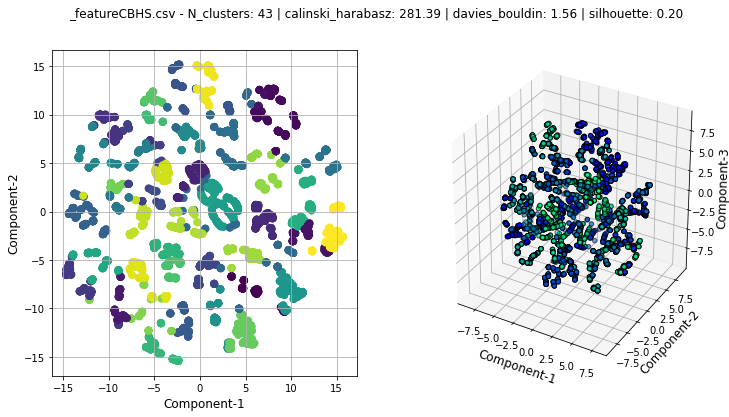

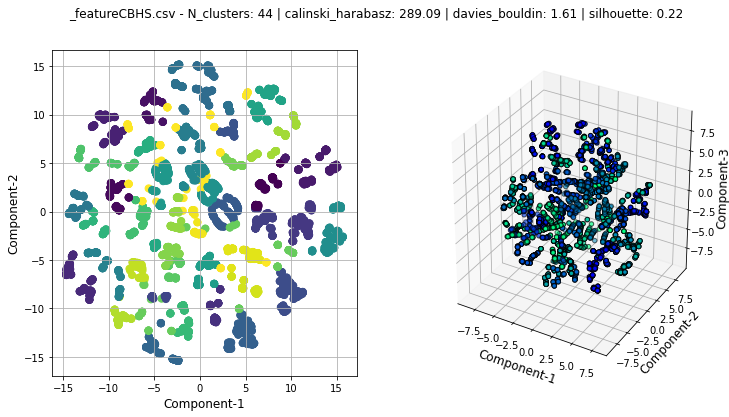

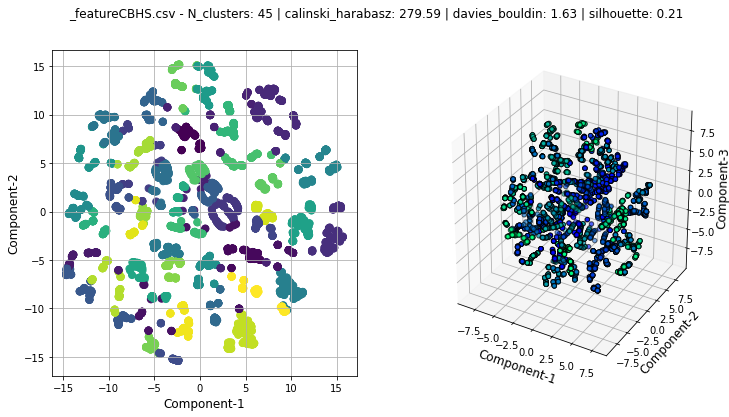

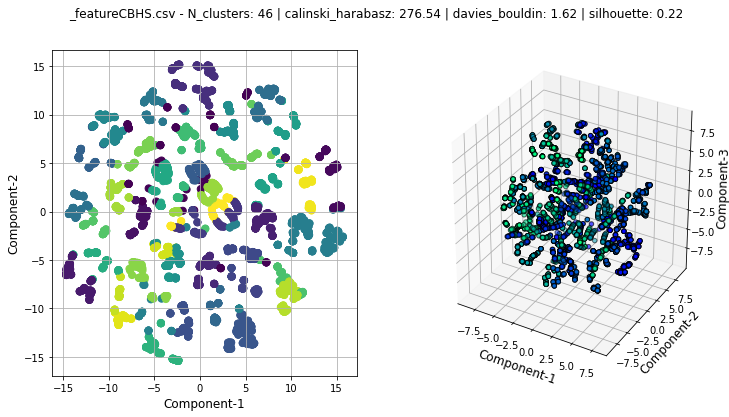

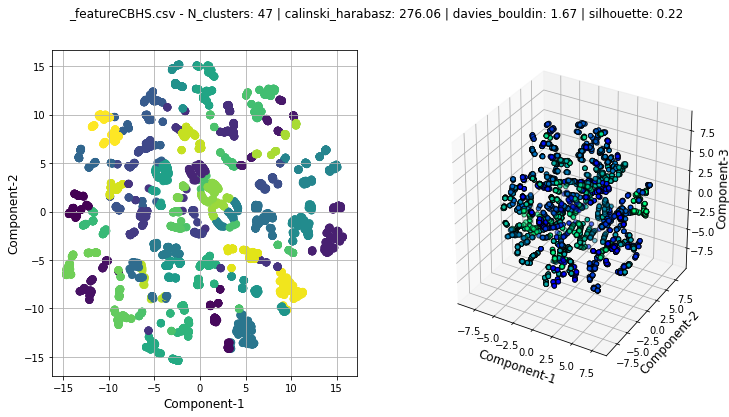

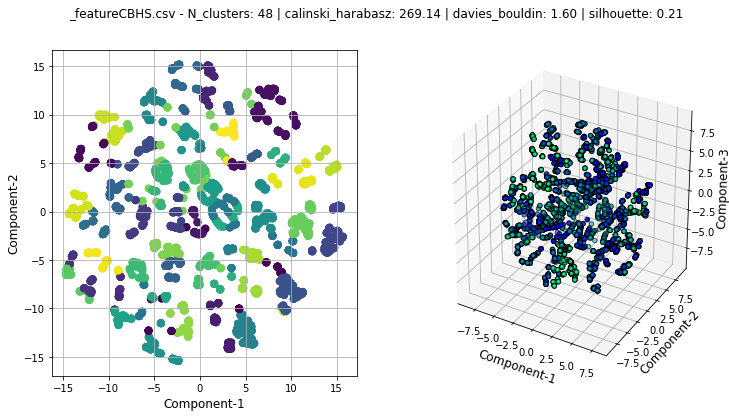

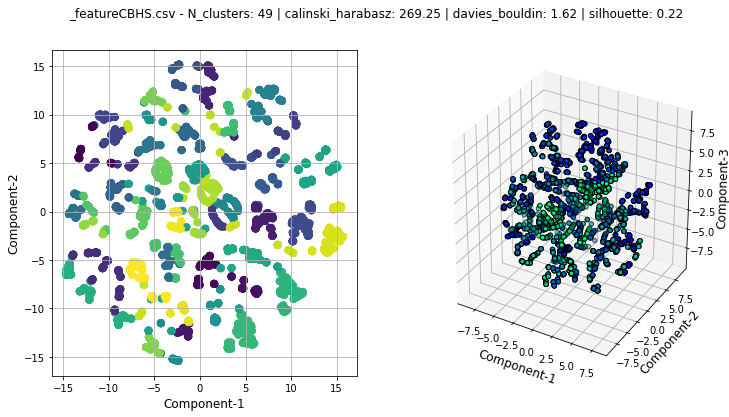

In [18]:
from sklearn import metrics
from sklearn.cluster import KMeans
for i in range(2,50):
    km = KMeans(i)
    labels = km.fit_predict(X)
    score1 = metrics.calinski_harabasz_score(X, labels)
    score2 = metrics.davies_bouldin_score(X, labels)
    score3 = metrics.silhouette_score(X, labels, metric='euclidean')
    if (score3>=0.2):
        ds.plot(colors=labels, addText = 'N_clusters: ' + str(i) + 
                ' | calinski_harabasz: {0:,.2f}'.format(score1) +
                ' | davies_bouldin: {0:,.2f}'.format(score2)+
                ' | silhouette: {0:,.2f}'.format(score3))

In [ ]:
# Export clustering results to file
idx = np.arange(0, X1.shape[0], 1)
idx0 = idx[clusts==0]
idx1 = idx[clusts==1]

print(iD[idx0].shape, iD[idx1].shape)
df1 = pd.DataFrame(data = iD1[idx0],columns={'id'})
df1["cluster"] = clusts[idx0]
df2 = pd.DataFrame(data = iD1[idx1],columns={'id'})
df2["cluster"] = clusts[idx1]
df = pd.concat([df1,df2])
df.to_csv('clusters.csv', index=False)
df.head()

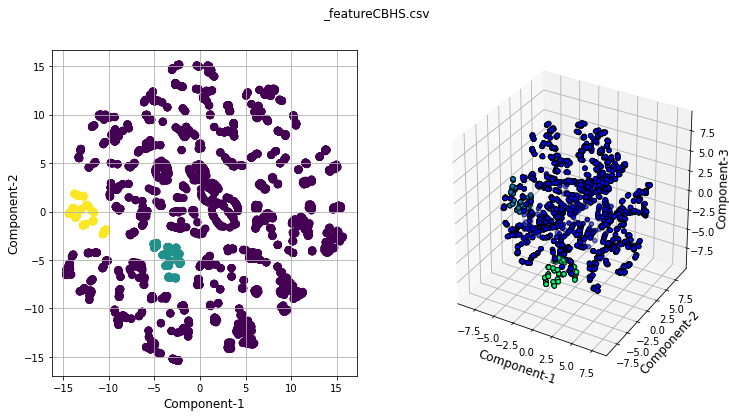

In [8]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, min_samples=20).fit(X)
ds.plot(colors = dbscan.labels_)